based on https://medium.com/towards-data-science/feature-selection-with-pandas-e3690ad8504b

In [1]:
#importing libraries
import pandas as pd
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm
%matplotlib inline
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.feature_selection import RFE
from sklearn.linear_model import RidgeCV, LassoCV, Ridge, Lasso

In [2]:
# load longest trip
filepath = "data/Battery_and_Heating_Data_in_Real_Driving_Cycles-Full_trips/train/TripB14.csv"
df = pd.read_csv(filepath, sep=";", encoding="ISO-8859-2")
df.head()

,Time [s],Velocity [km/h],Elevation [m],Throttle [%],Motor Torque [Nm],Longitudinal Acceleration [m/s^2],Regenerative Braking Signal,Battery Voltage [V],Battery Current [A],Battery Temperature [°C],...,Temperature Footweel Driver [°C],Temperature Footweel Co-Driver [°C],Temperature Feetvent Co-Driver [°C],Temperature Feetvent Driver [°C],Temperature Head Co-Driver [°C],Temperature Head Driver [°C],Temperature Vent right [°C],Temperature Vent central right [°C],Temperature Vent central left [°C],Temperature Vent right [°C]
0,0.0,0.0,500.0,0.0,0.0,-0.24,0.0,391.6,-1.1,3.0,...,3.98,3.98,2.93,2.93,8.60,9.83,5.29,4.15,4.59,5.46
1,0.1,0.0,500.0,0.0,0.0,-0.27,0.0,391.6,-1.1,3.0,...,3.98,3.98,2.93,2.93,8.60,9.83,5.29,4.15,4.59,5.46
2,0.2,0.0,500.0,0.0,0.0,-0.27,0.0,391.6,-1.1,3.0,...,3.98,3.98,2.93,2.93,8.60,9.83,5.29,4.15,4.59,5.46
3,0.3,0.0,500.0,0.0,0.0,-0.25,0.0,391.6,-1.1,3.0,...,3.98,3.98,2.93,2.93,8.59,9.84,5.29,4.15,4.59,5.47
4,0.4,0.0,500.0,0.0,0.0,-0.24,0.0,391.6,-1.1,3.0,...,3.98,3.98,2.94,2.93,8.57,9.87,5.29,4.16,4.60,5.48


In [6]:
df.columns

Index(['Time [s]', 'Velocity [km/h]', 'Elevation [m]', 'Throttle [%]',
       'Motor Torque [Nm]', 'Longitudinal Acceleration [m/s^2]',
       'Regenerative Braking Signal ', 'Battery Voltage [V]',
       'Battery Current [A]', 'Battery Temperature [°C]',
       'max. Battery Temperature [°C]', 'SoC [%]', 'displayed SoC [%]',
       'min. SoC [%]', 'max. SoC [%)', 'Heating Power CAN [kW]',
       'Heating Power LIN [W]', 'Requested Heating Power [W]',
       'AirCon Power [kW]', 'Heater Signal', 'Heater Voltage [V]',
       'Heater Current [A]', 'Ambient Temperature [°C]',
       'Ambient Temperature Sensor [°C]',
       'Coolant Temperature Heatercore [°C]',
       'Requested Coolant Temperature [°C]', 'Coolant Temperature Inlet [°C]',
       'Coolant Volume Flow +500 [l/h]', 'Heat Exchanger Temperature [°C]',
       'Cabin Temperature Sensor [°C]',
       'Temperature Coolant Heater Inlet [°C]',
       'Temperature Coolant Heater Outlet [°C]',
       'Temperature Heat Exchanger Outle

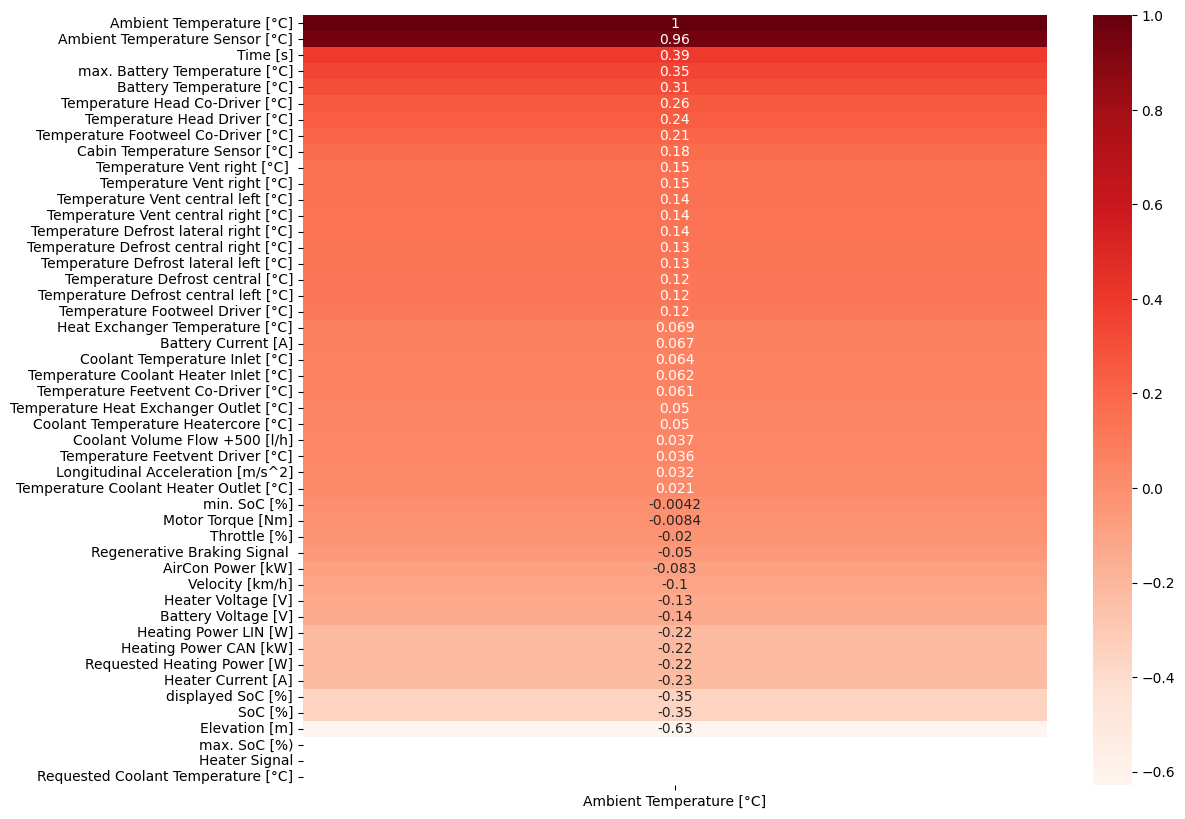

In [15]:
#Using Pearson Correlation
plt.figure(figsize=(12,10))
target = "Ambient Temperature [°C]"
correlations = df.corr()[[target]].sort_values(by=target, ascending=False)  # Select only 'SoC [%]'
# correlations = df.corr()[[target]].sort_values(by=target, ascending=False)  # Select only 'SoC [%]'
sns.heatmap(correlations, annot=True, cmap=plt.cm.Reds)
plt.show()

In [16]:
#Correlation with target variable
cor_target = correlations[target]
#Selecting highly correlated features
# relevant_features = cor_target[abs(cor_target)>=0.5].sort_values(ascending=False)
relevant_features
cor_target.sort_values(ascending=False)

Ambient Temperature [°C]                  1.000000
Ambient Temperature Sensor [°C]           0.955037
Time [s]                                  0.390425
max. Battery Temperature [°C]             0.347868
Battery Temperature [°C]                  0.310887
Temperature Head Co-Driver [°C]           0.259550
Temperature Head Driver [°C]              0.238344
Temperature Footweel Co-Driver [°C]       0.210790
Cabin Temperature Sensor [°C]             0.177531
Temperature Vent right [°C]               0.154143
Temperature Vent right [°C]               0.147497
Temperature Vent central left [°C]        0.141827
Temperature Vent central right [°C]       0.140081
Temperature Defrost lateral right [°C]    0.138300
Temperature Defrost central right [°C]    0.134463
Temperature Defrost lateral left [°C]     0.129209
Temperature Defrost central [°C]          0.115842
Temperature Defrost central left [°C]     0.115830
Temperature Footweel Driver [°C]          0.115581
Heat Exchanger Temperature [°C]